# In this file:
    - estemated 2 types of vectorization(BOW and multinomial) in usage with custom classifier and sklearn GaussianNB
    - cross validation used for better model estimation
    - used Naive Bayes classifiers from sklearn
    - conclusions of rwsults at the end

# Spam classification

In [1]:
# import os
import json
import numpy as np
import pandas as pd
from numpy import random

from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as progressbar

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams['figure.figsize'] = [9, 6]

## Load data

In [5]:
def load_json_from_file(filename):
    with open(filename, "r", encoding="utf-8") as f:
        return json.load(f)

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

In [7]:
# os.chdir('./gdrive/My Drive/data')
# os.listdir()

In [8]:
emails_tokenized_ham = load_json_from_file(r"C:\Users\user\Jupyter\gl-ml-basecamp\HW-3\data\emails-tokenized-ham.json")
emails_tokenized_spam = load_json_from_file(r"C:\Users\user\Jupyter\gl-ml-basecamp\HW-3\data\emails-tokenized-spam.json")
#vocab = load_json_from_file("vocab.json")

In [9]:
import itertools
vocab_set = set(itertools.chain(*emails_tokenized_ham)).union(set(itertools.chain(*emails_tokenized_spam)))

In [10]:
vocab = {
    word: index
    for index, word in enumerate(sorted(list(vocab_set)))
}

In [11]:
# vocab

In [12]:
len(vocab)

34147

In [13]:
sample_emails = [emails_tokenized_ham[42], emails_tokenized_spam[42]]
for email in sample_emails:
    print(email)
    print()

['accord', 'son', 'actual', 'homer', 'simpson', 'claim', 'french', 'word', 'victori', 'chuck', 'thursday', 'august', 'number', 'number', 'number', 'number', 'pm', 'robert', 'harley', 'wrote', 'appar', 'quot', 'dubya', 'time', 'sent', 'dad', 'httpaddress', 'toni', 'blair', 'special', 'relationship', 'georg', 'w', 'bush', 'consider', 'strain', 'two', 'disagre', 'yassir', 'arafat', 'tenur', 'leader', 'palestinian', 'author', 'blair', 'start', 'tell', 'disparag', 'anecdot', 'presid', 'baro', 'william', 'crosbi', 'recal', 'stori', 'told', 'good', 'friend', 'toni', 'blair', 'recent', 'brighton', 'blair', 'bush', 'jacqu', 'chirac', 'discuss', 'econom', 'particular', 'declin', 'french', 'economi', 'problem', 'french', 'bush', 'confid', 'blair', 'word', 'entrepreneur', 'r', 'httpaddress', 'httpaddress']

['miss', 'amaz', 'busi', 'opportun', 'weight', 'loss', 'product', 'pleas', 'visit', 'www', 'autodreamteam', 'com', 'oblig', 'worth', 'look']



In [14]:
def email_to_vector_bow(email_words, vocab):
    email_vec = np.zeros(len(vocab), dtype="int32")
    
    for word in email_words:
        if word in vocab:
            email_vec[vocab[word]] = 1
            
    return email_vec

In [15]:
def email_to_vector_multinomial(email_words, vocab):
    return np.array([vocab[word] for word in email_words], dtype="int32")

In [16]:
# email2vec = email_to_vector_multinomial

In [17]:
# X = [
#     email2vec(email, vocab)
#     for email in emails_tokenized_ham + emails_tokenized_spam
# ]
# np.shape(X)

In [18]:
email2vec = email_to_vector_bow

In [19]:
X_bow = [
    email2vec(email, vocab)
    for email in emails_tokenized_ham + emails_tokenized_spam
]
np.shape(X_bow)

(5543, 34147)

In [20]:
# X[0][0].shape

In [21]:
for email in sample_emails:
    email_vec = email2vec(email, vocab)
    
    print("Email text:", email)
    print("Email vector:", email_vec)
    print("Length:", email_vec.shape)
    print()

Email text: ['accord', 'son', 'actual', 'homer', 'simpson', 'claim', 'french', 'word', 'victori', 'chuck', 'thursday', 'august', 'number', 'number', 'number', 'number', 'pm', 'robert', 'harley', 'wrote', 'appar', 'quot', 'dubya', 'time', 'sent', 'dad', 'httpaddress', 'toni', 'blair', 'special', 'relationship', 'georg', 'w', 'bush', 'consider', 'strain', 'two', 'disagre', 'yassir', 'arafat', 'tenur', 'leader', 'palestinian', 'author', 'blair', 'start', 'tell', 'disparag', 'anecdot', 'presid', 'baro', 'william', 'crosbi', 'recal', 'stori', 'told', 'good', 'friend', 'toni', 'blair', 'recent', 'brighton', 'blair', 'bush', 'jacqu', 'chirac', 'discuss', 'econom', 'particular', 'declin', 'french', 'economi', 'problem', 'french', 'bush', 'confid', 'blair', 'word', 'entrepreneur', 'r', 'httpaddress', 'httpaddress']
Email vector: [0 0 0 ... 0 0 0]
Length: (34147,)

Email text: ['miss', 'amaz', 'busi', 'opportun', 'weight', 'loss', 'product', 'pleas', 'visit', 'www', 'autodreamteam', 'com', 'obli

In [22]:
y = np.array([0] * len(emails_tokenized_ham) + [1] * len(emails_tokenized_spam))
len(y)

5543

In [23]:
# y

## Train Model

In [24]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.1, random_state=42)

Підрахуємо сумарну кількість слів у ham- і spam-листах відповідно.

In [25]:
ham_total_words_train = sum(len(email) for email, cls in zip(X_train_bow, y_train_bow) if cls == 0)
spam_total_words_train = sum(len(email) for email, cls in zip(X_train_bow, y_train_bow) if cls == 1)

In [26]:
print(ham_total_words_train)
print(spam_total_words_train)

121495026
48830210


Тепер обчислимо апріорні ймовірності для класів ham і spam.

Щоб уникнути машинних проблем із множенням великої кількості малих дробів, ми працюватимемо з логарифмами ймовірностей.
$\log{P(ham)} = \log{\frac{\sum_{i=1}^{m}1\{y^{(i)}=ham\}}{m}}$

$\log{P(spam)} = \log{\frac{\sum_{i=1}^{m}1\{y^{(i)}=spam\}}{m}}$

In [27]:
ham_email_indices = np.where(y_train_bow == 0)[0]
spam_email_indices = np.where(y_train_bow == 1)[0]

In [28]:
ham_email_indices

array([   0,    1,    2, ..., 4982, 4983, 4987], dtype=int64)

In [29]:
ham_log_prior = np.log(len(ham_email_indices) / len(y_train_bow))
spam_log_prior = np.log(len(spam_email_indices) / len(y_train_bow))

In [30]:
print(ham_log_prior)
print(spam_log_prior)

-0.33783643857414664
-1.2493605835459742


Обчислимо правдоподібності (likelihood) для кожного слова. Також застосуємо згладжування Лапласа, щоб уникнути ділення на нуль. Вважаємо, що бачили кожне слово на один раз більше.

$\log{\phi_{word\,|\,class}} = \log{\frac{\sum_{i=1}^{m} \sum_{j=1}^{n_i} {1\{x_{j}^{(j)}=word \, \land \, y=class\}} + 1}{\sum_{i=1}^{m}{1\{y=class\}n_i} \,+\, |V|}}$

Створимо порожні вектори $\log{\phi_{word \, | \, ham}}$ та $\log{\phi_{word \, | \, spam}}$ і заповнимо їх для кожного слова зі словника.

In [31]:
ham_log_phi = np.zeros(len(vocab), dtype="float64")
spam_log_phi = np.zeros(len(vocab), dtype="float64")

In [32]:
ham_word_counts = np.zeros(len(vocab))
spam_word_counts = np.zeros(len(vocab))

In [33]:
for email_index in progressbar(range(len(X_train_bow)), desc="Train"):
    for word_index in X_train_bow[email_index]:
        if y_train_bow[email_index] == 0:
            ham_word_counts[word_index] += 1
        if y_train_bow[email_index] == 1:
            spam_word_counts[word_index] += 1

ham_log_phi = np.log((ham_word_counts + 1) / (ham_total_words_train + len(vocab)))
spam_log_phi = np.log((spam_word_counts + 1) / (spam_total_words_train + len(vocab)))

Train:   0%|          | 0/4988 [00:00<?, ?it/s]

In [34]:
ham_word_counts[1]

349418.0

## Predict

$\log P(y=class\,|\,words) = \log \frac{P(words\,|\,y=class) P(y=class)}{P(words)} = \sum_{i=1}^{n} \log P(words_i\,|\,y=class) + \log P(y=class) - \log P(words)$


Пригадайте, що знаменник $P(words)$ — один і той самий для обох класів, тому для передбачення його можна проігнорувати.

In [35]:
def predict(X):
    y_pred = np.zeros(len(X))

    for i in progressbar(range(len(y_pred)), desc="Predict"):
        email_vector = X[i]
        ham_posterior = ham_log_phi[email_vector].sum() + ham_log_prior
        spam_posterior = spam_log_phi[email_vector].sum() + spam_log_prior

        # Whichever class has the bigger posterior probability, wins.
        y_pred[i] = 0 if ham_posterior > spam_posterior else 1
    
    return y_pred

In [36]:
custom_pred_train_bow = predict(X_train_bow)
custom_pred_test_bow = predict(X_test_bow)

Predict:   0%|          | 0/4988 [00:00<?, ?it/s]

Predict:   0%|          | 0/555 [00:00<?, ?it/s]

In [37]:
custom_accuracy_train_bow = 1 - np.sum(custom_pred_train_bow != y_train_bow) / len(y_train_bow)
custom_accuracy_test_bow = 1 - np.sum(custom_pred_test_bow != y_test_bow) / len(y_test_bow)

In [38]:
print("Training accuracy:   {0:.3f}%".format(custom_accuracy_train_bow * 100))
print("Test accuracy:       {0:.3f}%".format(custom_accuracy_test_bow * 100))

Training accuracy:   68.665%
Test accuracy:       70.811%


In [39]:
from sklearn.metrics import confusion_matrix
cm_custom_model_bow = confusion_matrix(y_test_bow, custom_pred_test_bow)
print(cm_custom_model_bow)

[[354  40]
 [122  39]]


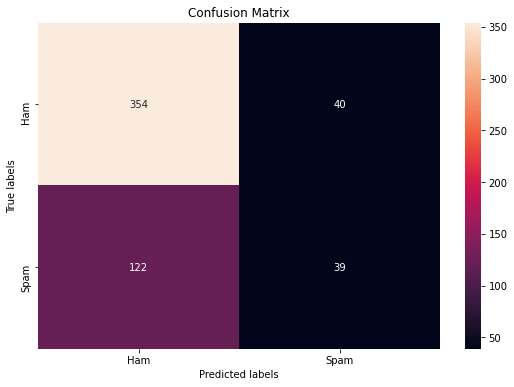

In [40]:
import seaborn as sns
labels = ['Ham','Spam']

ax= plt.subplot()
sns.heatmap(cm_custom_model_bow, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
# sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# sns.heatmap(cm, linewidths=1, annot=True, fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

![Metrics](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bow,  custom_pred_test_bow, target_names = labels))

              precision    recall  f1-score   support

         Ham       0.74      0.90      0.81       394
        Spam       0.49      0.24      0.33       161

    accuracy                           0.71       555
   macro avg       0.62      0.57      0.57       555
weighted avg       0.67      0.71      0.67       555



# let's use vectorization function email_to_vector_multinomial

In [42]:
email2vec_multinomial = email_to_vector_multinomial

In [43]:
X_multi = [
    email2vec_multinomial(email, vocab)
    for email in emails_tokenized_ham + emails_tokenized_spam
]
np.shape(X_multi)

(5543,)

In [44]:
np.shape(X_bow)

(5543, 34147)

In [45]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.1, random_state=42)

 'y' we have equal for both situations and we don't need to recalculate part of values for training but we need to retrain on new vectors

In [46]:
for email_index in progressbar(range(len(X_train_multi)), desc="Train"):
    for word_index in X_train_multi[email_index]:
        if y_train_multi[email_index] == 0:
            ham_word_counts[word_index] += 1
        if y_train_multi[email_index] == 1:
            spam_word_counts[word_index] += 1

ham_log_phi = np.log((ham_word_counts + 1) / (ham_total_words_train + len(vocab)))
spam_log_phi = np.log((spam_word_counts + 1) / (spam_total_words_train + len(vocab)))

Train:   0%|          | 0/4988 [00:00<?, ?it/s]

In [47]:
custom_pred_train_multi = predict(X_train_multi)
custom_pred_test_multi = predict(X_test_multi)

Predict:   0%|          | 0/4988 [00:00<?, ?it/s]

Predict:   0%|          | 0/555 [00:00<?, ?it/s]

In [48]:
custom_accuracy_train_multi = 1 - np.sum(custom_pred_train_multi != y_train_multi) / len(y_train_multi)
custom_accuracy_test_multi = 1 - np.sum(custom_pred_test_multi != y_test_multi) / len(y_test_multi)

In [49]:
print("Training accuracy:   {0:.3f}%".format(custom_accuracy_train_multi * 100))
print("Test accuracy:       {0:.3f}%".format(custom_accuracy_test_multi * 100))

Training accuracy:   91.921%
Test accuracy:       88.829%


In [50]:
pd.DataFrame([['Custom Classifier with bow vect', custom_accuracy_train_bow, custom_accuracy_test_bow],
             ['Custom Classifier with multi vect', custom_accuracy_train_multi, custom_accuracy_test_multi]],
             columns=['Model', 'Accuracy train', 'Accuracy test'],).style.highlight_max()

,Model,Accuracy train,Accuracy test
0,Custom Classifier with bow vect,0.686648,0.708108
1,Custom Classifier with multi vect,0.919206,0.888288


### conclusion: for custom model better to use multinomial vectorization



# Usage sklearn.naive_bayes GaussianNB for classification

In [51]:
from sklearn.naive_bayes import GaussianNB

gnb_bow = GaussianNB()
gnb_bow.fit(X_train_bow, y_train_bow)
y_pred_train_bow = gnb_bow.predict(X_train_bow)
y_pred_test_bow = gnb_bow.predict(X_test_bow)

In [52]:
sklearn_accuracy_train_bow = 1 - np.sum(y_pred_train_bow != y_train_bow) / len(y_train_bow)
sklearn_accuracy_test_bow = 1 - np.sum(y_pred_test_bow != y_test_bow) / len(y_test_bow)

In [53]:
print("Training accuracy:   {0:.3f}%".format(sklearn_accuracy_train_bow * 100))
print("Test accuracy:       {0:.3f}%".format(sklearn_accuracy_test_bow * 100))

Training accuracy:   97.815%
Test accuracy:       92.432%


# Cross validation for better model estimation

In [54]:
from sklearn.model_selection import cross_val_score
scores_bow = cross_val_score(gnb_bow, X_train_bow, y_train_bow, cv=5)

In [55]:
results = {}
results[0] = {'CV_mean':scores_bow.mean(), 'CV_std':scores_bow.std(), 'Test':sklearn_accuracy_test_bow}

for sklearn model we need rewrite email_to_vector_multinomial

In [56]:
def email_to_vector_multinomial2(email_words, vocab):
    email_vec = np.zeros(len(vocab), dtype="int32")
    
    for word in email_words:
        if word in vocab:
            email_vec[vocab[word]] = vocab[word]
            
    return email_vec

In [57]:
email2vec_multinomial = email_to_vector_multinomial2

In [58]:
X_multi = [
    email2vec_multinomial(email, vocab)
    for email in emails_tokenized_ham + emails_tokenized_spam
]
np.shape(X_multi)

(5543, 34147)

In [59]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.1, random_state=42)

In [60]:
gnb_multi = GaussianNB()
gnb_multi.fit(X_train_multi, y_train_multi)
y_pred_train_multi = gnb_multi.predict(X_train_multi)
y_pred_test_multi = gnb_multi.predict(X_test_multi)

In [61]:
sklearn_accuracy_train_multi = 1 - np.sum(y_pred_train_multi != y_train_multi) / len(y_train_multi)
sklearn_accuracy_test_multi = 1 - np.sum(y_pred_test_multi != y_test_multi) / len(y_test_multi)

In [62]:
print("Training accuracy:   {0:.3f}%".format(sklearn_accuracy_train_multi * 100))
print("Test accuracy:       {0:.3f}%".format(sklearn_accuracy_test_multi * 100))

Training accuracy:   97.815%
Test accuracy:       92.252%


In [63]:
scores_multi = cross_val_score(gnb_multi, X_train_multi, y_train_multi, cv=5)

In [64]:
results[1] = {'CV_mean':scores_multi.mean(), 'CV_std':scores_multi.std(), 'Test':sklearn_accuracy_test_multi}

In [65]:
results = pd.DataFrame(results).T
results.style.highlight_max()

,CV_mean,CV_std,Test
0,0.925819,0.010650,0.924324
1,0.920807,0.009580,0.922523


# Conclusions 
Sklearn model:
- with multinomial vectorization sklearn model works a little worse (difference = 0.005 by cros validation score(folds = 5)) 

- but std little less it says that model more stable

Custom model:
- multinomial vectorization shows much better results


My question: why we have this paradox that bow better for sklearn model?

For using cross validation for custom method we need to make from if new class CustomClassification(BaseEstimator, ClassifierMixin)   
it will be done by 24.03